In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Primary EDA and preprocessing

In [2]:
df = pd.read_csv('dataset02.csv')

In [3]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
df.shape

(731, 16)

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df.isna().sum() # no NaN values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df['yr'].describe()

count    731.000000
mean       0.500684
std        0.500342
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: yr, dtype: float64

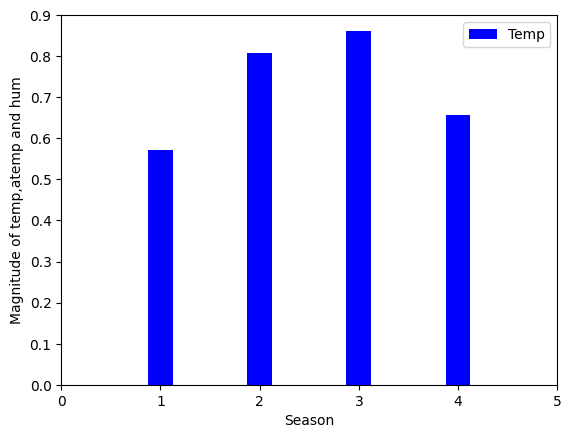

In [9]:
# analysing temp,atemp,hum with respect season and month
plt.xlabel("Season")
plt.ylabel("Magnitude of temp,atemp and hum")
plt.ylim(0,0.9)
plt.xlim(0,5)
plt.bar(df['season'],df['temp'],0.25,color="b",label="Temp")
plt.legend()
plt.show()

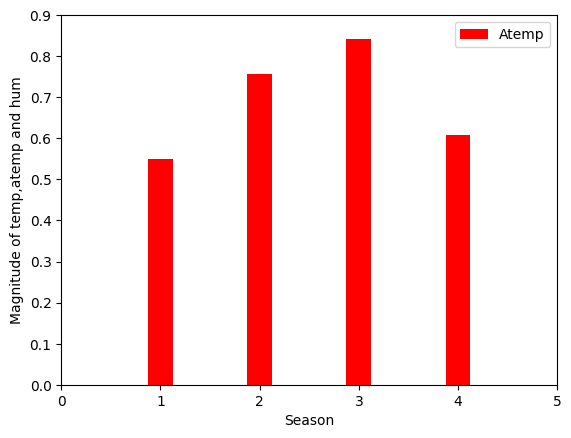

In [10]:
plt.xlabel("Season")
plt.ylabel("Magnitude of temp,atemp and hum")
plt.ylim(0,0.9)
plt.xlim(0,5)
plt.bar(df['season'],df['atemp'],0.25,color="r",label="Atemp")
plt.legend()
plt.show()

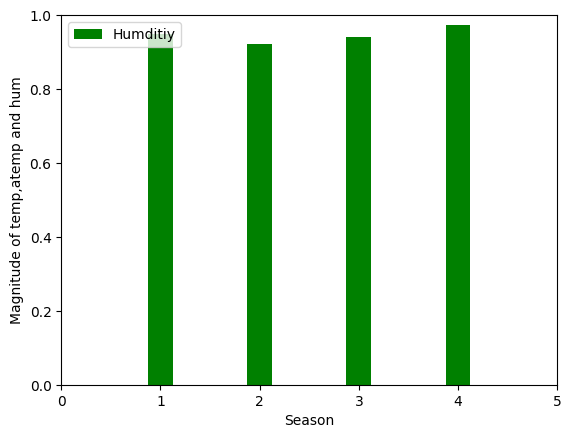

In [11]:
plt.xlabel("Season")
plt.ylabel("Magnitude of temp,atemp and hum")
plt.ylim(0,1)
plt.xlim(0,5)
plt.bar(df['season'],df['hum'],0.25,color="g",label="Humditiy")
plt.legend()
plt.show()

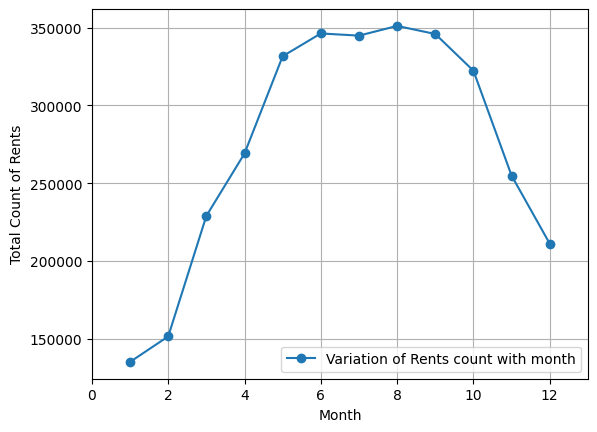

In [12]:
# checking how the 'cnt' varies with season 
season_variation = df.groupby(['mnth'])['cnt'].sum()
season_variation

# visualization
plt.xlabel("Month")
plt.ylabel("Total Count of Rents")
plt.xlim(0,13)
plt.grid(True)
plt.plot(season_variation.index,season_variation.values,marker="o",linestyle="-",label="Variation of Rents count with month")
plt.legend()
plt.show()

In [13]:
season_variation

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

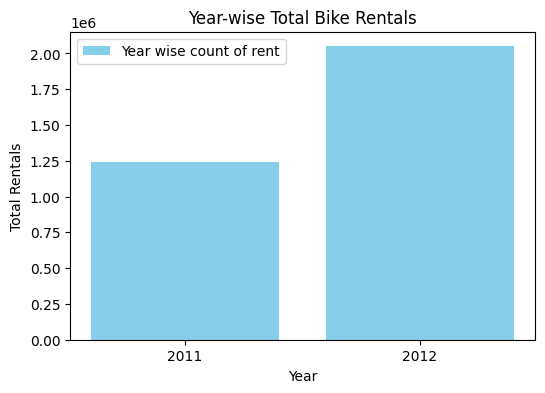

In [14]:
year_wise_count = df.groupby('yr')['cnt'].sum()
year_labels = {0: "2011", 1: "2012"}
plt.figure(figsize=(6,4))
plt.bar(year_wise_count.index.map(year_labels), year_wise_count.values, color="skyblue")
plt.xlabel("Year")
plt.ylabel("Total Rentals")
plt.title("Year-wise Total Bike Rentals")
plt.legend(["Year wise count of rent"])
plt.show()

# Basic LR model without any feature engineering or preprocessing just to get the the overview about the dataset with linear models

In [15]:
'''
Training the the first simple linear regression model

for the time being, dropping the registered and casual column...by creating a copy of the original dataset
'''
df_copy = df.copy()

In [16]:
df_copy = df_copy.drop(['casual','registered'],axis=1)

In [17]:
df_copy = df_copy.drop(['dteday','instant'],axis=1)

In [18]:
# now training the LR model on this dataset. with CNT as label
from sklearn.model_selection import train_test_split
X = df_copy.drop(['cnt'],axis=1)
y = df['cnt']

X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.shape,y_train.shape,x_test.shape,y_test.shape

((584, 11), (584,), (147, 11), (147,))

In [20]:
# training the linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
reg_model_simple_lr = LinearRegression()
reg_model_simple_lr.fit(X_train,y_train)
predictions_simple_lr = reg_model_simple_lr.predict(x_test)
rmse_simple_lr = np.sqrt(mean_squared_error(y_test,predictions_simple_lr))
r2_simple_lr = r2_score(y_test, predictions_simple_lr)
print("R² Score:", r2_simple_lr)
print("RMSE: ",rmse_simple_lr)

R² Score: 0.8276670090367213
RMSE:  831.2851545662685


# Further analysing the dataset 

`Simple LR model`: **RMSE: 831.2851545662685 and R2 Score: 0.8276670090367213**

In [21]:
df_main_copy = df.copy() # creating another copy of the original dataset

In [22]:
df_main_copy

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [23]:
'''
Checking if columns like weekday, workingday,holiday affect cnt
'''
column_affect = df.groupby(['weekday','workingday','holiday'])['cnt'].sum()
column_affect

df_main_copy['amt_of_work'] = (df_main_copy['weekday'] + df_main_copy['workingday'] + df_main_copy['holiday']) / 3

In [24]:
df_main_copy.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,amt_of_work
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2.000000
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0.000000
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0.666667
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.000000
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1.333333
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,1.666667
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,2.000000
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,2.000000
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,0.000000
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,0.666667


In [25]:
amt_of_work = df_main_copy.groupby(['amt_of_work'])['cnt'].sum()

In [26]:
amt_of_work

amt_of_work
0.000000    444027
0.666667    455503
1.000000    469109
1.333333    473048
1.666667    485395
2.000000    965597
Name: cnt, dtype: int64

In [27]:
correlation = df_main_copy['amt_of_work'].corr(df_main_copy['cnt'])
print("Correlation:", correlation)

Correlation: 0.07408469963569536


In [28]:
'''
from sklearn.ensemble import RandomForestRegressor

X = df_main_copy.drop(columns=["cnt","dteday","instant","casual","registered"])
y = df_main_copy["cnt"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importance_copy = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance_copy)
'''

'\nfrom sklearn.ensemble import RandomForestRegressor\n\nX = df_main_copy.drop(columns=["cnt","dteday","instant","casual","registered"])\ny = df_main_copy["cnt"]\n\n# Train-test split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Train Random Forest\nrf = RandomForestRegressor(random_state=42)\nrf.fit(X_train, y_train)\n\n# Feature importance\nfeature_importance_copy = pd.DataFrame({\n    "Feature": X.columns,\n    "Importance": rf.feature_importances_\n}).sort_values(by="Importance", ascending=False)\n\nprint(feature_importance_copy)\n'

In [29]:
'''
dropping the columns like casual,registered,dteday,instant as they have little or no effect on the target column cnt
NEXT STEPS:
1. Training the final LR model 
2. Evaluation methods: MAE,MSE,RMSE,cross-val-eval
3. Probably using Batch GD to optimize the model and also, Ridge regression
'''

'\ndropping the columns like casual,registered,dteday,instant as they have little or no effect on the target column cnt\nNEXT STEPS:\n1. Training the final LR model \n2. Evaluation methods: MAE,MSE,RMSE,cross-val-eval\n3. Probably using Batch GD to optimize the model and also, Ridge regression\n'

# Final Linear regression model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error
from sklearn.model_selection import train_test_split

In [31]:
df = df.drop(['instant','dteday','casual','registered'],axis=1)
X = df.drop(['cnt'],axis=1)
y = df['cnt']
final_model = LinearRegression()

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((657, 11), (74, 11), (657,), (74,))

In [33]:
from sklearn.model_selection import cross_val_score
final_model.fit(X_train,y_train)
final_predictions = final_model.predict(X_test)
mse_final = mean_squared_error(y_test,final_predictions)
rmse_final = root_mean_squared_error(y_test,final_predictions)
mae_final = mean_absolute_error(y_test,final_predictions)
cvs_final = cross_val_score(final_model,X,y,cv=3)
print("Mean Square Error: ",mse_final)
print("Root Mean Square Error: ",rmse_final)
print("Mean Absolute Error: ",mae_final)
print("Cross Validate Score: ",cvs_final.mean())

Mean Square Error:  631564.5736935155
Root Mean Square Error:  794.7103709487599
Mean Absolute Error:  622.389437771153
Cross Validate Score:  0.6002335358335725


In [34]:
# Ridge Regression model
ridge_model = Ridge(alpha=2.7,solver="cholesky")
ridge_model.fit(X_train,y_train)
ridge_final_predictions = ridge_model.predict(X_test)
ridged_mse_final = mean_squared_error(y_test,ridge_final_predictions)
ridged_rmse_final = root_mean_squared_error(y_test,ridge_final_predictions)
ridged_mae_final = mean_absolute_error(y_test,ridge_final_predictions)
ridged_cvs_final = cross_val_score(ridge_model,X,y,cv=3,scoring="r2")
print("Mean Square Error: ",ridged_mse_final)
print("Root Mean Square Error: ",ridged_rmse_final)
print("Mean Absolute Error: ",ridged_mae_final)
print("Cross Validate Score: ",ridged_cvs_final.mean())

Mean Square Error:  668975.3515424193
Root Mean Square Error:  817.9091340377728
Mean Absolute Error:  647.2020843572363
Cross Validate Score:  0.6131128449894717


In [35]:
# Lasso Regression Model
lasso_model = Lasso(alpha=2.7)
lasso_model.fit(X_train,y_train)
lasso_final_predictions = lasso_model.predict(X_test)
lasso_mse_final = mean_squared_error(y_test,lasso_final_predictions)
lasso_rmse_final = root_mean_squared_error(y_test,lasso_final_predictions)
lasso_mae_final = mean_absolute_error(y_test,lasso_final_predictions)
lasso_cvs_final = cross_val_score(lasso_model,X,y,cv=3)
print("Mean Square Error: ",lasso_mse_final)
print("Root Mean Square Error: ",lasso_rmse_final)
print("Mean Absolute Error: ",lasso_mae_final)
print("Cross Validate Score: ",lasso_cvs_final.mean())

Mean Square Error:  652312.5135830967
Root Mean Square Error:  807.6586615539368
Mean Absolute Error:  631.3684501438504
Cross Validate Score:  0.6040487611045204


In [36]:
from sklearn.linear_model import RidgeCV
alphas = [2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0]
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=3)  # 5-fold CV
ridge_cv.fit(X, y)
print("Best alpha:", ridge_cv.alpha_)
print("Best CV score:", ridge_cv.best_score_)

Best alpha: 2.7
Best CV score: 0.6131128449894717


## Comparing Models

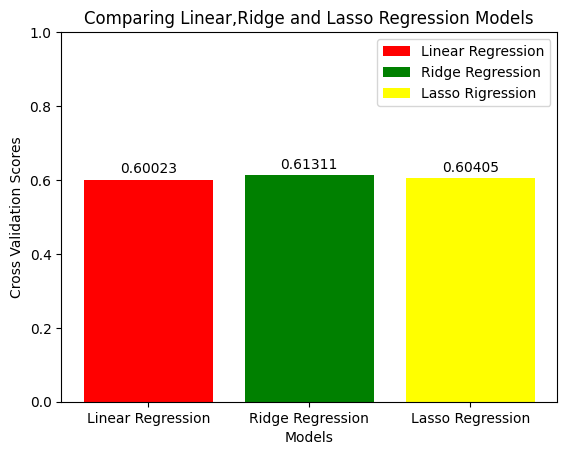

In [37]:
models = ['Linear Regression','Ridge Regression','Lasso Regression']
cvs_scores = [cvs_final.mean(),ridged_cvs_final.mean(),lasso_cvs_final.mean()]
colors = ['red','green','yellow']
labels = ['Linear Regression','Ridge Regression','Lasso Rigression']
plt.xlabel("Models")
plt.ylabel("Cross Validation Scores")
plt.ylim(0,1)
plt.bar(models,cvs_scores,color=colors,label=labels)
plt.title("Comparing Linear,Ridge and Lasso Regression Models")
plt.legend()
for i, score in enumerate(cvs_scores):
    plt.text(i, score + 0.01, f"{score:.5f}", ha='center', va='bottom')
plt.show()